In [1]:
from keras.models import load_model
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = load_model("cnn_image_classifier.h5")

In [3]:
URL = "https://i.ytimg.com/vi/SfLV8hD7zX4/maxresdefault.jpg"
test_image = imread(URL)

In [4]:
def show_image(image, prediction=None, confidence=None, show_confidence=False):
    plt.imshow(image)
    plt.axis('off')
    if prediction is not None:
        plt.rc('axes', titlesize=16)
        if show_confidence:
            plt.title("I predict this is a " + str(prediction) + "! (with confidence " + str(confidence) + ")")
        else:
            plt.title("I predict this is a " + str(prediction) + "!")
    plt.show()

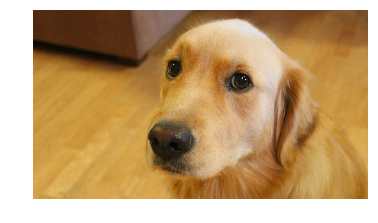

In [5]:
show_image(test_image)

In [6]:
def fix_image(image):
    return resize(image, (150, 150, 3), mode='constant')

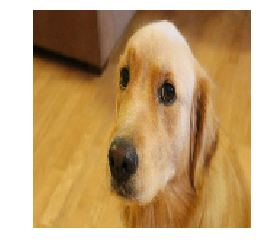

In [7]:
image_in = fix_image(test_image)
show_image(image_in)

In [8]:
def get_prediction(image):
    images_to_predict = np.asarray([image])
    predictions = model.predict(images_to_predict)
    prediction = predictions[0][0]
    return prediction

In [9]:
prediction = get_prediction(image_in)
print("I predict " + str(prediction) + "!")

I predict 0.992685!


In [10]:
def cat_or_dog(image):
    images_to_predict = np.asarray([image])
    predictions = model.predict(images_to_predict)
    confidence = predictions[0][0]
    if confidence > 0.5:
        return "dog", confidence
    else:
        return "cat", 1 - confidence

In [11]:
prediction, confidence = cat_or_dog(image_in)
print("I predict " + prediction + "!")

I predict dog!


In [12]:
def cat_or_dog_url(URL, show_confidence=False):
    test_image = imread(URL)
    image_in = fix_image(test_image)
    prediction, confidence = cat_or_dog(image_in)
    show_image(test_image, prediction=prediction, confidence=confidence, show_confidence=show_confidence)

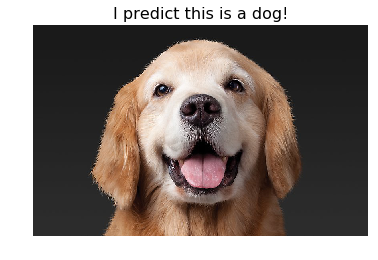

In [13]:
cat_or_dog_url("https://s7d2.scene7.com/is/image/PetSmart/PB1201_STORY_CARO-Authority-HealthyOutside-DOG-20160818?$PB1201$")

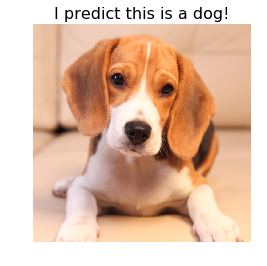

In [14]:
cat_or_dog_url("https://www.what-dog.net/Images/faces2/scroll001.jpg")

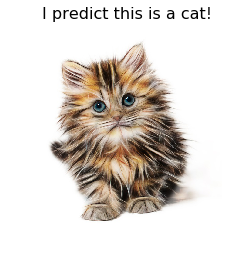

In [15]:
cat_or_dog_url("https://cdn.pixabay.com/photo/2016/08/10/02/55/kitten-1582384_960_720.jpg")

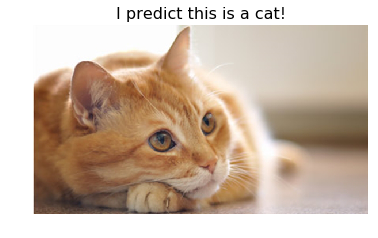

In [16]:
cat_or_dog_url("https://www.cats.org.uk/uploads/images/featurebox_sidebar_kids/grief-and-loss.jpg")